In [14]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("diabetes.csv")
df

,id,preg,plas,pres,skin,insu,mass,pedi,age,class
0,1,6,148,72,35,0,33.6,0.627,50,tested_positive
1,2,1,85,66,29,0,26.6,0.351,31,tested_negative
2,3,8,183,64,0,0,23.3,0.672,32,tested_positive
3,4,1,89,66,23,94,28.1,0.167,21,tested_negative
4,5,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...,...
763,764,10,101,76,48,180,32.9,0.171,63,tested_negative
764,765,2,122,70,27,0,36.8,0.340,27,tested_negative
765,766,5,121,72,23,112,26.2,0.245,30,tested_negative
766,767,1,126,60,0,0,30.1,0.349,47,tested_positive


# 1.Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

In [ ]:
  Title: Pima Indians Diabetes Database
 
  Sources:
    (a) Original owners: National Institute of Diabetes and Digestive and
                         Kidney Diseases
    (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                           Research Center, RMI Group Leader
                           Applied Physics Laboratory
                           The Johns Hopkins University
                           Johns Hopkins Road
                           Laurel, MD 20707
                           (301) 953-6231
    (c) Date received: 9 May 1990
  
  Relevant Information:
       Several constraints were placed on the selection of these instances from
       a larger database.  In particular, all patients here are females at
       least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
       routine that generates and executes digital analogs of perceptron-like
       devices.  It is a unique algorithm; see the paper for details.
  
  Number of Instances: 768
 
  Number of Attributes: 8 plus class 
 
  For Each Attribute: (all numeric-valued)
    1. Number of times pregnant
    2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    3. Diastolic blood pressure (mm Hg)
    4. Triceps skin fold thickness (mm)
    5. 2-Hour serum insulin (mu U/ml)
    6. Body mass index (weight in kg/(height in m)^2)
    7. Diabetes pedigree function
    8. Age (years)
    9. Class variable (0 or 1)
 
  Missing Attribute Values: None
 
  Class Distribution: (class value 1 is interpreted as "tested positive for
    diabetes")
 
  Class Value  Number of instances
    0            500
    1            268
    
  Relabeled values in attribute 'class'
    From: 0                       To: tested_negative     
    From: 1                       To: tested_positive 

# 2.Compute mean & standard deviation ,tabulate and visualize the age of the patients

In [5]:
df['age'].mean()

33.240885416666664

In [6]:
df['age'].std()

11.76023154067868

In [8]:
pd.DataFrame(df['age'])

,age
0,50
1,31
2,32
3,21
4,33
...,...
763,63
764,27
765,30
766,47


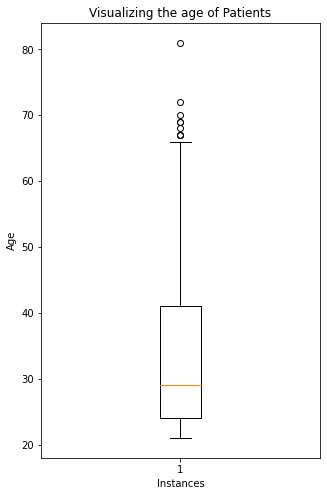

In [15]:
plt.figure(figsize = (5, 8))
plt.boxplot(df['age'])     # Scatter plot is to get relationship between two variables  
plt.xlabel('Instances')
plt.ylabel('Age')
plt.title('Visualizing the age of Patients')
plt.show()

# 3.Analyze and tabulate the relationship of age,BMI of patientswith respect to the class

In [17]:
bmi_age = pd.crosstab(df['mass'], df['age'])
bmi_age

age,21,22,23,24,25,26,27,28,29,30,...,63,64,65,66,67,68,69,70,72,81
mass,,,,,,,,,,,,,,,,,,,,,
0.0,3,2,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
18.2,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18.4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19.1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19.3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53.2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57.3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


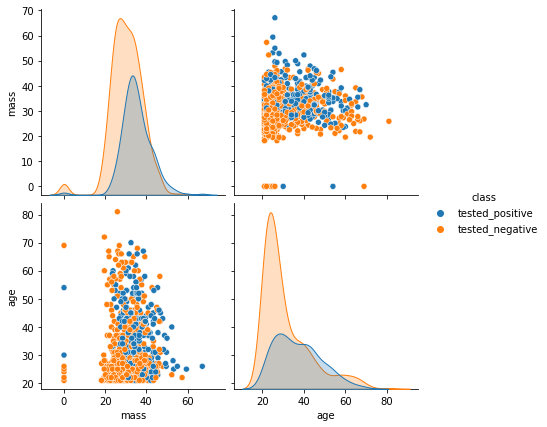

In [21]:
sb.pairplot(df, vars = ['mass', 'age'] ,hue = 'class', height = 3)

# 4.Tabulate the class label and comment on whether the classes are balanced.

In [23]:
pd.crosstab(df['class'], df['class'])
#not balanced

class,tested_negative,tested_positive
class,,
tested_negative,500,0
tested_positive,0,268


# 5.Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_splitmethod in sklearn. 

In [26]:
df1 = pd.get_dummies(df['class'])
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.drop('class', axis=1, inplace=True)
df

,id,preg,plas,pres,skin,insu,mass,pedi,age,tested_negative,tested_positive
0,1,6,148,72,35,0,33.6,0.627,50,0,1
1,2,1,85,66,29,0,26.6,0.351,31,1,0
2,3,8,183,64,0,0,23.3,0.672,32,0,1
3,4,1,89,66,23,94,28.1,0.167,21,1,0
4,5,0,137,40,35,168,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...,...,...
763,764,10,101,76,48,180,32.9,0.171,63,1,0
764,765,2,122,70,27,0,36.8,0.340,27,1,0
765,766,5,121,72,23,112,26.2,0.245,30,1,0
766,767,1,126,60,0,0,30.1,0.349,47,0,1


In [24]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df[['preg', 'plas', 'pres', 'insu', 'mass', 'pedi','age']], df.tested_negative,  test_size = 0.3, random_state = 42)

In [37]:
x_test

,preg,plas,pres,insu,mass,pedi,age
668,6,98,58,190,34.0,0.430,43
324,2,112,75,0,35.7,0.148,21
624,2,108,64,0,30.8,0.158,21
690,8,107,80,0,24.6,0.856,34
473,7,136,90,0,29.9,0.210,50
...,...,...,...,...,...,...,...
619,0,119,0,0,32.4,0.141,24
198,4,109,64,99,34.8,0.905,26
538,0,127,80,210,36.3,0.804,23
329,6,105,70,68,30.8,0.122,37


In [38]:
x_train

,preg,plas,pres,insu,mass,pedi,age
334,1,95,60,58,23.9,0.260,22
139,5,105,72,325,36.9,0.159,28
485,0,135,68,250,42.3,0.365,24
547,4,131,68,166,33.1,0.160,28
18,1,103,30,83,43.3,0.183,33
...,...,...,...,...,...,...,...
71,5,139,64,140,28.6,0.411,26
106,1,96,122,0,22.4,0.207,27
270,10,101,86,0,45.6,1.136,38
435,0,141,0,0,42.4,0.205,29


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()

In [43]:
model.fit(x_train, y_train)  

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
model.coef_

array([[-0.0572301 , -0.03604523,  0.0109521 ,  0.00106108, -0.10793756,
        -0.3699078 , -0.0363679 ]])

In [45]:
model.intercept_

array([9.4365588])

In [46]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=uint8)

In [47]:
model.score(x_test, y_test)

0.7359307359307359

In [48]:
model.predict_proba(x_test)

array([[0.26799571, 0.73200429],
       [0.19238342, 0.80761658],
       [0.12094625, 0.87905375],
       [0.14311777, 0.85688223],
       [0.50098075, 0.49901925],
       [0.45478756, 0.54521244],
       [0.01332157, 0.98667843],
       [0.59241664, 0.40758336],
       [0.56713383, 0.43286617],
       [0.79835202, 0.20164798],
       [0.23962651, 0.76037349],
       [0.90969382, 0.09030618],
       [0.39602206, 0.60397794],
       [0.26653114, 0.73346886],
       [0.06577684, 0.93422316],
       [0.34750898, 0.65249102],
       [0.13087134, 0.86912866],
       [0.06891944, 0.93108056],
       [0.86315327, 0.13684673],
       [0.59636614, 0.40363386],
       [0.21394583, 0.78605417],
       [0.07595871, 0.92404129],
       [0.49814742, 0.50185258],
       [0.09465489, 0.90534511],
       [0.55493888, 0.44506112],
       [0.8938403 , 0.1061597 ],
       [0.11256537, 0.88743463],
       [0.03059426, 0.96940574],
       [0.28493828, 0.71506172],
       [0.11003448, 0.88996552],
       [0.

# 6. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[ 50,  30],
       [ 31, 120]], dtype=int64)

In [51]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive: ", tp)
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)

True Positive:  120
True Negative:  50
False Positive:  30
False Negative:  31


Text(0.5, 1.0, 'Confusion Matrix')

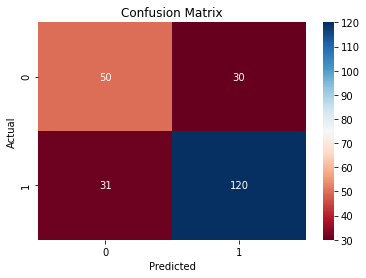

In [52]:
sb.heatmap(con_mat, annot = True, cmap = "RdBu", fmt = "0.0f", xticklabels = [0, 1], yticklabels = [0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix") 

# 7. Compute accuracy rate, true positive and true negative rate and comment on the performance.

In [53]:
from sklearn.metrics import accuracy_score, recall_score

In [54]:
accuracy_score(y_test, y_pred)

0.7359307359307359

In [55]:
recall_score(y_test, y_pred)

0.7947019867549668

In [56]:
tnr = (tn) / (tn + fp)
tnr  

0.625

# 8. Visualize the ROC curve, and comment on the performance of the classifier

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

In [58]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7098509933774835

In [59]:
fpr, tpr, _ = roc_curve(y_test, y_pred)  

In [61]:
base_line_pred = [0 for _ in range(len(y_test))]

In [62]:
base_line_auc = roc_auc_score(y_test, base_line_pred)
base_line_auc

0.5

In [63]:
base_line_fpr, base_line_tpr, _ = roc_curve(y_test, base_line_pred)

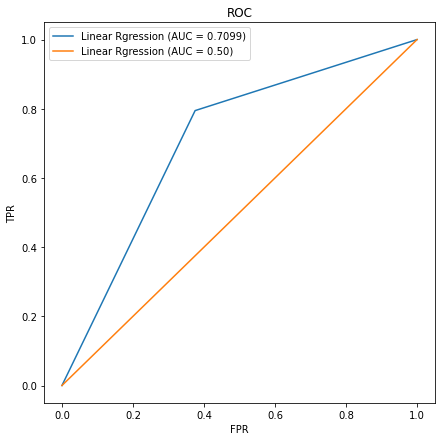

In [65]:
plt.figure(figsize = (7, 7))

plt.plot(fpr, tpr, label = 'Linear Rgression (AUC = %0.4f)' %auc )
plt.plot(base_line_fpr, base_line_tpr, label = 'Linear Rgression (AUC = %0.2f)' %base_line_auc )

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()